# Single-deme WF simulator and SFS calculator

#### Chris Porras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### WF simulator

In [442]:
# %%timeit
def WF_sim(N,s,num_reps,num_gen):
    f = np.zeros((num_reps,num_gen+1))
    p = np.zeros(num_reps)
    for i in range(num_reps):
        for j in range(num_gen):
            p[i] = f[i,j]-s*f[i,j]*(1-f[i,j])
            if p[i] == 0:
                f[i,j+1]= 1/N
            else:
                f[i,j+1]= np.random.binomial(N,p[i])/N
    return f

In [446]:
# Define parameters
s = 10**-1
N = 10**8
num_reps = 10**0
num_gen = 10**8

In [447]:
# np.random.seed(1)
f = WF_sim(N,s,num_reps,num_gen)
print(np.mean(f))

2.0013715999862845e-08


In [440]:
num_reps = 1
num_gen = 10**6
f_arr = np.zeros((len(s_arr),num_gen+1))

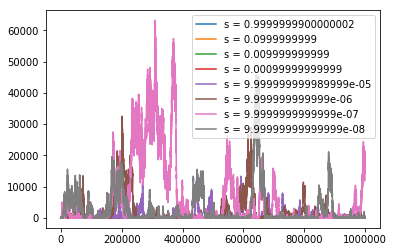

In [441]:
for s in range(len(s_arr)):
    f_arr[s] = WF_sim(N,s_arr[s],num_reps,num_gen)
    plt.plot(N*f_arr[s],label = "s = "+ str(s_arr[s]))
plt.legend()
plt.show()

In [ ]:
def fixtime(f_arr):
    
    

In [378]:
s_arr

array([9.99999990e-01, 9.99999999e-02, 1.00000000e-02, 1.00000000e-03,
       1.00000000e-04, 1.00000000e-05, 1.00000000e-06, 1.00000000e-07])

In [390]:
f_arr.shape

(8, 10001)

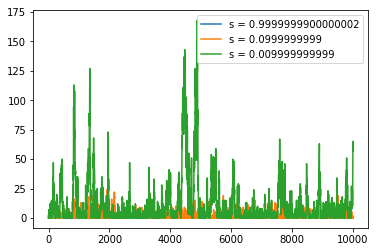

In [433]:
for i in range(3):
    plt.plot(N*f_arr[i],label = "s = "+ str(s_arr[i]))
plt.legend()
plt.show()

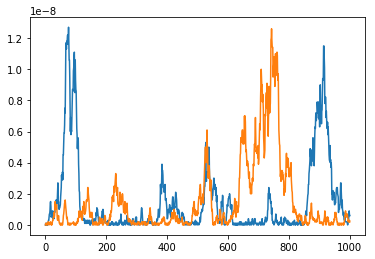

In [374]:
for i in range(2):
    plt.plot(f[i])
plt.show()

In [375]:
f

array([[0.00e+00, 1.00e-10, 0.00e+00, ..., 9.00e-10, 6.00e-10, 6.00e-10],
       [0.00e+00, 1.00e-10, 1.00e-10, ..., 2.00e-10, 3.00e-10, 2.00e-10],
       [0.00e+00, 1.00e-10, 0.00e+00, ..., 4.88e-08, 4.61e-08, 4.64e-08],
       ...,
       [0.00e+00, 1.00e-10, 3.00e-10, ..., 2.00e-10, 2.00e-10, 1.00e-10],
       [0.00e+00, 1.00e-10, 0.00e+00, ..., 3.27e-08, 3.28e-08, 3.14e-08],
       [0.00e+00, 1.00e-10, 1.00e-10, ..., 9.00e-10, 1.30e-09, 1.00e-09]])

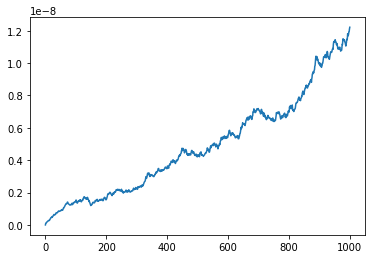

In [376]:
plt.plot(np.mean(f,axis=0))

#### What is $\langle f \rangle$ now?

In [242]:
print(s_arr)

[9.99999990e-01 9.99999999e-02 1.00000000e-02 1.00000000e-03
 1.00000000e-04 1.00000000e-05 1.00000000e-06 1.00000000e-07
 1.00000000e-08 1.00000000e-09]


In [245]:
s_arr = 1/(10**np.arange(10)+10**-8)
obs = np.zeros_like(s_arr)
pred = np.zeros_like(obs)
mus = np.zeros_like(pred)

In [289]:
for s in range(len(s_arr)):
    f = WF_sim(N,s_arr[s],num_reps,num_gen)
#     mus[s] = np.sum(f == 0)/(num_gen*num_reps)
    obs[s] = np.mean(f[f>0])
    pred[s] = (1/(s_arr[s]))/(np.log(1/(s_arr[s])))

KeyboardInterrupt: 

In [ ]:
pred

In [ ]:
plt.loglog(s_arr,pred)
plt.show()

In [278]:
obs

array([1.00000000e-10, 2.45403990e-10, 1.25626937e-09, 3.58985865e-09,
       6.62378045e-09, 4.59579304e-09, 3.68266775e-09, 5.46180971e-09,
       3.62412706e-09, 5.77314324e-09])

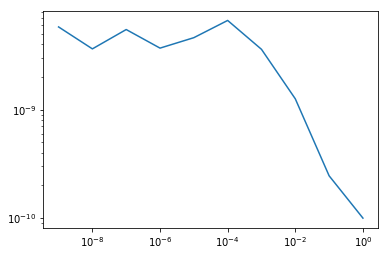

In [279]:
plt.loglog(s_arr,obs)
plt.show()

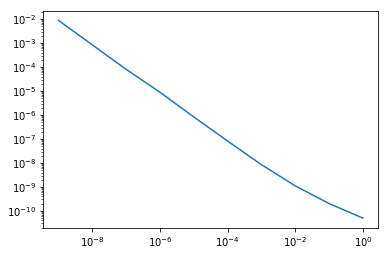

In [280]:
plt.loglog(s_arr,mus/(N*s_arr))

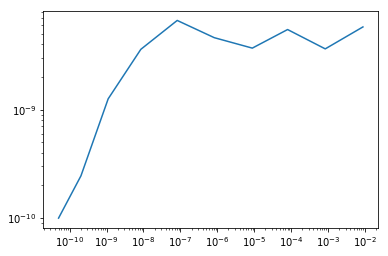

In [281]:
plt.loglog(mus/(N*s_arr),obs)

In [282]:
obs

array([1.00000000e-10, 2.45403990e-10, 1.25626937e-09, 3.58985865e-09,
       6.62378045e-09, 4.59579304e-09, 3.68266775e-09, 5.46180971e-09,
       3.62412706e-09, 5.77314324e-09])

In [259]:
mus/(N*s_arr)

array([5.00560005e-04, 2.03470000e-03, 1.14250000e-02, 9.04700000e-02,
       8.48900000e-01, 8.11200000e+00, 7.93900000e+01, 8.10300000e+02,
       8.62000000e+03, 8.09500000e+04])

In [227]:
pred = (1/(s_arr))//(np.log(1/(s_arr)))
pred

array([1.00000002e+08, 4.00000000e+00, 2.10000000e+01, 1.44000000e+02,
       1.08500000e+03])

In [197]:
f[f > 0]

array([0.001, 0.001, 0.001, ..., 0.001, 0.002, 0.001])

In [192]:
np.mean(f)

0.0020064982501749847

In [198]:
np.mean(f[f > 0])

0.0025081115273453925

In [200]:
(1/(2*s))/np.log(1/(2*s))

5.601775147155687

In [177]:
f.shape

(1000, 10001)

In [179]:
mu = np.sum(f == 0)/(num_gen*num_reps)

In [187]:
mu/(N*s)

0.002000164

In [125]:
np.mean(f)

0.0020064982501749847

In [184]:
(1-f)*s

array([[0.1   , 0.0999, 0.0999, ..., 0.0998, 0.0997, 0.0996],
       [0.1   , 0.0999, 0.0999, ..., 0.0999, 0.1   , 0.0999],
       [0.1   , 0.0999, 0.0998, ..., 0.0999, 0.0999, 0.0999],
       ...,
       [0.1   , 0.0999, 0.0999, ..., 0.0999, 0.0998, 0.0996],
       [0.1   , 0.0999, 0.0999, ..., 0.0995, 0.0989, 0.0993],
       [0.1   , 0.0999, 0.1   , ..., 0.0999, 0.0998, 0.0999]])

In [168]:
N*s

100.0

In [133]:
1/(5*N*s)

0.002

In [170]:
2*s*np.exp(-2*N*s)

2.767793053473475e-88

In [127]:
np.mean(f)

0.0020064982501749847

In [128]:
f.shape

(1000, 10001)

### Time to fixation

In [313]:
f.shape

(100, 1001)

In [332]:
f_zeros= np.where(np.ravel(f)==0)[0]
f_zeros

array([    0,     3,     5, ..., 99940, 99949, 99964])

In [333]:
fix_time = np.zeros_like(f_zeros)

In [336]:
fix_time = np.zeros_like(f_zeros)
f_zeros= np.where(np.ravel(f)==0)[0]
for i in range(1,len(f_zeros)-1):
    fix_time[i] = f_zeros[i+1] - f_zeros[i]

In [344]:
len(f_zeros)

50100

In [345]:
num_gen*num_reps

100000

In [337]:
fix_time

array([ 0,  2,  2, ...,  9, 15,  0])

In [346]:
s_arr = 1/(10**np.arange(8)+10**-8)
fixpts = np.zeros_like(s_arr)
avg_fixtime = np.zeros_like(s_arr)

In [342]:
fix_time = np.zeros((len(f_zeros),len(s_arr)))

In [354]:
for s in range(len(s_arr)):
    f = WF_sim(N,s_arr[s],num_reps,num_gen)
    fixpts[s] = np.mean(np.where(f == 0))
    f_zeros= np.where(np.ravel(f)==0)[0]
    fix_time = np.zeros_like(f_zeros)    
    for i in range(1,len(f_zeros)-1):
        fix_time[i] = f_zeros[i+1] - f_zeros[i]
    avg_fixtime[s] = np.mean(fix_time)

In [364]:
avg_fixtime = np.zeros_like(s_arr)

In [365]:
for s in range(len(s_arr)):
    f = WF_sim(N,s_arr[s],num_reps,num_gen)
    avg_fixtime[s] = ((num_gen*num_reps) - np.sum(f == 0))/(np.sum(f == 0))

In [363]:
((num_gen*num_reps) - np.sum(f == 0))/(np.sum(f == 0))

10.523392486748099

In [358]:
avg_fixtime

array([ 1.99794411,  5.01136477,  8.87083333, 11.19044956, 11.79087587,
       12.29807102, 11.71144395, 11.53433971])

In [367]:
avg_fixtime

array([ 0.99600798,  3.92222879,  8.19793966, 10.71234481, 10.51941021,
       10.73295788, 10.23595506, 11.11680601])

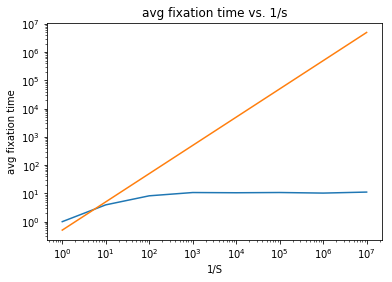

In [372]:
plt.loglog(1/s_arr,avg_fixtime)
plt.loglog(1/s_arr,1/(2*s_arr))
plt.title("avg fixation time vs. 1/s")
plt.ylabel("avg fixation time")
plt.xlabel("1/S")
plt.show()

### $\langle \zeta \rangle$ calculator

In [154]:
from scipy.special import binom
def freq_sfs(f,n,i_min = 1,i_max = n-1):
    if np.isscalar(f):
        sfs = np.zeros(n+1)
    else:
        sfs = np.zeros(tuple([n+1]) + f.shape)
    for i in range(i_min,i_max+1):
        sfs[i] = binom(n,i)*f**i * (1-f)**(n-i)
    return sfs

## Usage, where F is an array of frequencies:
# avg_sfs = np.mean(freq_sfs(F, n, i_max))

In [159]:
pi = freq_sfs(f.T,2,i_min=1, i_max = 1)
avg_pi = np.mean(pi,axis=2)
avg_pi.shape

(3, 10001)

In [160]:
sfs = freq_sfs(f.T,12,i_min=1, i_max = 10)
avg_sfs = np.mean(sfs,axis=2)
avg_sfs.shape

(13, 10001)

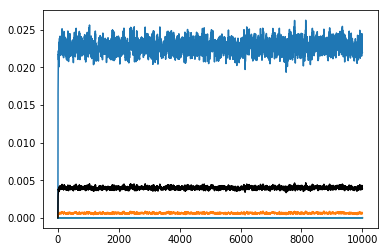

In [163]:
plt.plot(avg_pi[1],"-k",zorder=3, label='$\pi$')
plt.plot(avg_sfs[1:12].T,"-")
plt.show()

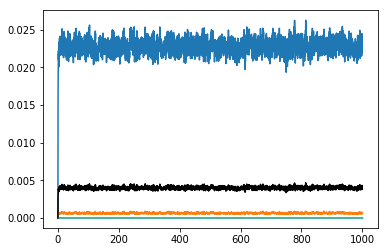

In [164]:
# scaled by s
plt.plot(np.arange(num_gen+1)*s, avg_pi[1],"-k",zorder=3, label='$\pi$')
plt.plot(np.arange(num_gen+1)*s, avg_sfs[1:11].T,"-")
plt.show()

In [119]:
def pi_plot(N,mu,s,num_reps,num_gen,p0,seed,xlim):
    np.random.seed(seed)
    f = WF_sim(N,s,num_reps,num_gen).T
    plt.plot(np.arange(num_gen+1)*s, freq_sfs(f,2,i_min=1, i_max = 1)[1],"-",zorder=3, label=f'$Ns = ${N*s}')
    plt.xlim(left = 0, right=xlim)
    plt.title(f'$\pi$ for demes = 1, mu = {mu}, N = {N}, time = {num_gen}')
    plt.legend()
#     plt.show()

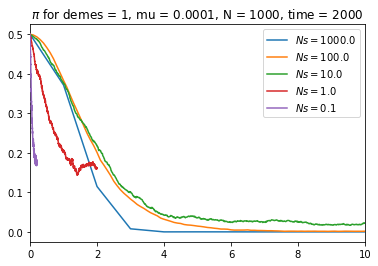

In [16]:
powers = np.arange(5)
s_arr = 1/np.power([10]*len(powers),powers)
xlim = 2*min(s_arr*num_gen)
for q in range(len(s_arr)):
    pi_plot(N,s_arr[q],num_reps,num_gen,seed=1,xlim=10)